# Expected Utility Tree

How does noise and correctness affect the expected utility

\begin{equation}
E[U(x)] = P(N|x) * Utility(n) + P(\neg N|x) \times []
\end{equation}

In [5]:
%matplotlib inline

STRUCTURED = '/Users/maru/MyCode/structured'
IMDB_DATA='/Users/maru/MyCode/data/imdb'
SRAA_DATA='/Users/maru/MyCode/data/sraa'
TWIITER_DATA = '/Users/maru/MyCode/data/twitter'


import sys
import os
sys.path.append(os.path.abspath(STRUCTURED))

import utilities.experimentutils as exputil
import utilities.datautils as datautil
import numpy as np

from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

mpl.style.use('ggplot')


In [11]:
N =100
utility = np.array([.5, .5, .5]) # neutral, postive, negative
neutral = np.linspace(0., 1., N)
correct = np.linspace(0., 1., N)
yclass = np.linspace(0., 1., N)

def exp_util(n, c, y, u):
#     eu = 1. * n *u[0] + (1-n)*( y*(c*u[1] + (1-c)*u[2] )  + (1-y)*(c*u[2] + (1-c)*u[1])  )

    eu = 1. *( y*(c*u[1] + (1-c)*u[2] )  + (1-y)*(c*u[2] + (1-c)*u[1])  )
    return eu



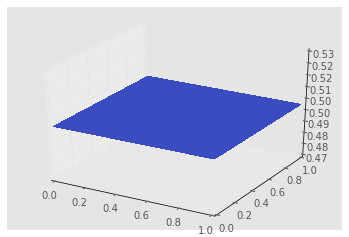

In [22]:
# output = [exp_util(n,c,y,utility) for n,c,y in zip(neutral, correct, yclass)]



fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(correct, yclass)
output = exp_util(neutral, X,Y, utility)

# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)
surf = ax.plot_surface(X,Y, output, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)

# ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()




In [21]:
print X*Y

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.02030405e-04   2.04060810e-04 ...,   9.89694929e-03
    9.99897970e-03   1.01010101e-02]
 [  0.00000000e+00   2.04060810e-04   4.08121620e-04 ...,   1.97938986e-02
    1.99979594e-02   2.02020202e-02]
 ..., 
 [  0.00000000e+00   9.89694929e-03   1.97938986e-02 ...,   9.60004081e-01
    9.69901031e-01   9.79797980e-01]
 [  0.00000000e+00   9.99897970e-03   1.99979594e-02 ...,   9.69901031e-01
    9.79900010e-01   9.89898990e-01]
 [  0.00000000e+00   1.01010101e-02   2.02020202e-02 ...,   9.79797980e-01
    9.89898990e-01   1.00000000e+00]]
